In [1]:
### --- iPython Config --- ###
from IPython import get_ipython
if 'IPython.extensions.autoreload' not in get_ipython().extension_manager.loaded:
    get_ipython().run_line_magic('load_ext', 'autoreload')
else:
    get_ipython().run_line_magic('reload_ext', 'autoreload')
%autoreload 2
from IPython.display import display

### --- System and Path --- ###
import os
import sys
repo_path = os.path.dirname(os.getcwd())
if repo_path not in sys.path:
    sys.path.append(repo_path)

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### --- Custom Modules --- ###
import src.config
from src.data import dataloader
from src.data.dataloader import optimize_memory_usage

In [2]:
file_path = os.path.join(repo_path, "data", "raw", "dataset.parquet")
df_dataset = dataloader.load_data(file_path)

Memory usage: Before=134.49MB -> After=65.62MB, Decreased by 51.2%
Data loaded successfully.


In [3]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  uint32 
 1   V1      568630 non-null  float32
 2   V2      568630 non-null  float32
 3   V3      568630 non-null  float32
 4   V4      568630 non-null  float32
 5   V5      568630 non-null  float32
 6   V6      568630 non-null  float32
 7   V7      568630 non-null  float32
 8   V8      568630 non-null  float32
 9   V9      568630 non-null  float32
 10  V10     568630 non-null  float32
 11  V11     568630 non-null  float32
 12  V12     568630 non-null  float32
 13  V13     568630 non-null  float32
 14  V14     568630 non-null  float32
 15  V15     568630 non-null  float32
 16  V16     568630 non-null  float32
 17  V17     568630 non-null  float32
 18  V18     568630 non-null  float32
 19  V19     568630 non-null  float32
 20  V20     568630 non-null  float32
 21  V21     56

In [4]:
# Missing Values
df_dataset.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
# Target proportion
display(df_dataset['Class'].value_counts())

Class
0    284315
1    284315
Name: count, dtype: int64

In [6]:
# nunique
df_dataset.nunique()

id        568630
V1        549654
V2        550034
V3        549967
V4        549433
V5        550248
V6        550157
V7        549278
V8        549055
V9        549969
V10       548759
V11       549783
V12       549073
V13       549848
V14       548652
V15       550025
V16       549434
V17       548685
V18       549778
V19       550122
V20       549794
V21       549874
V22       549944
V23       550306
V24       549987
V25       549994
V26       549645
V27       549288
V28       550389
Amount    506485
Class          2
dtype: int64

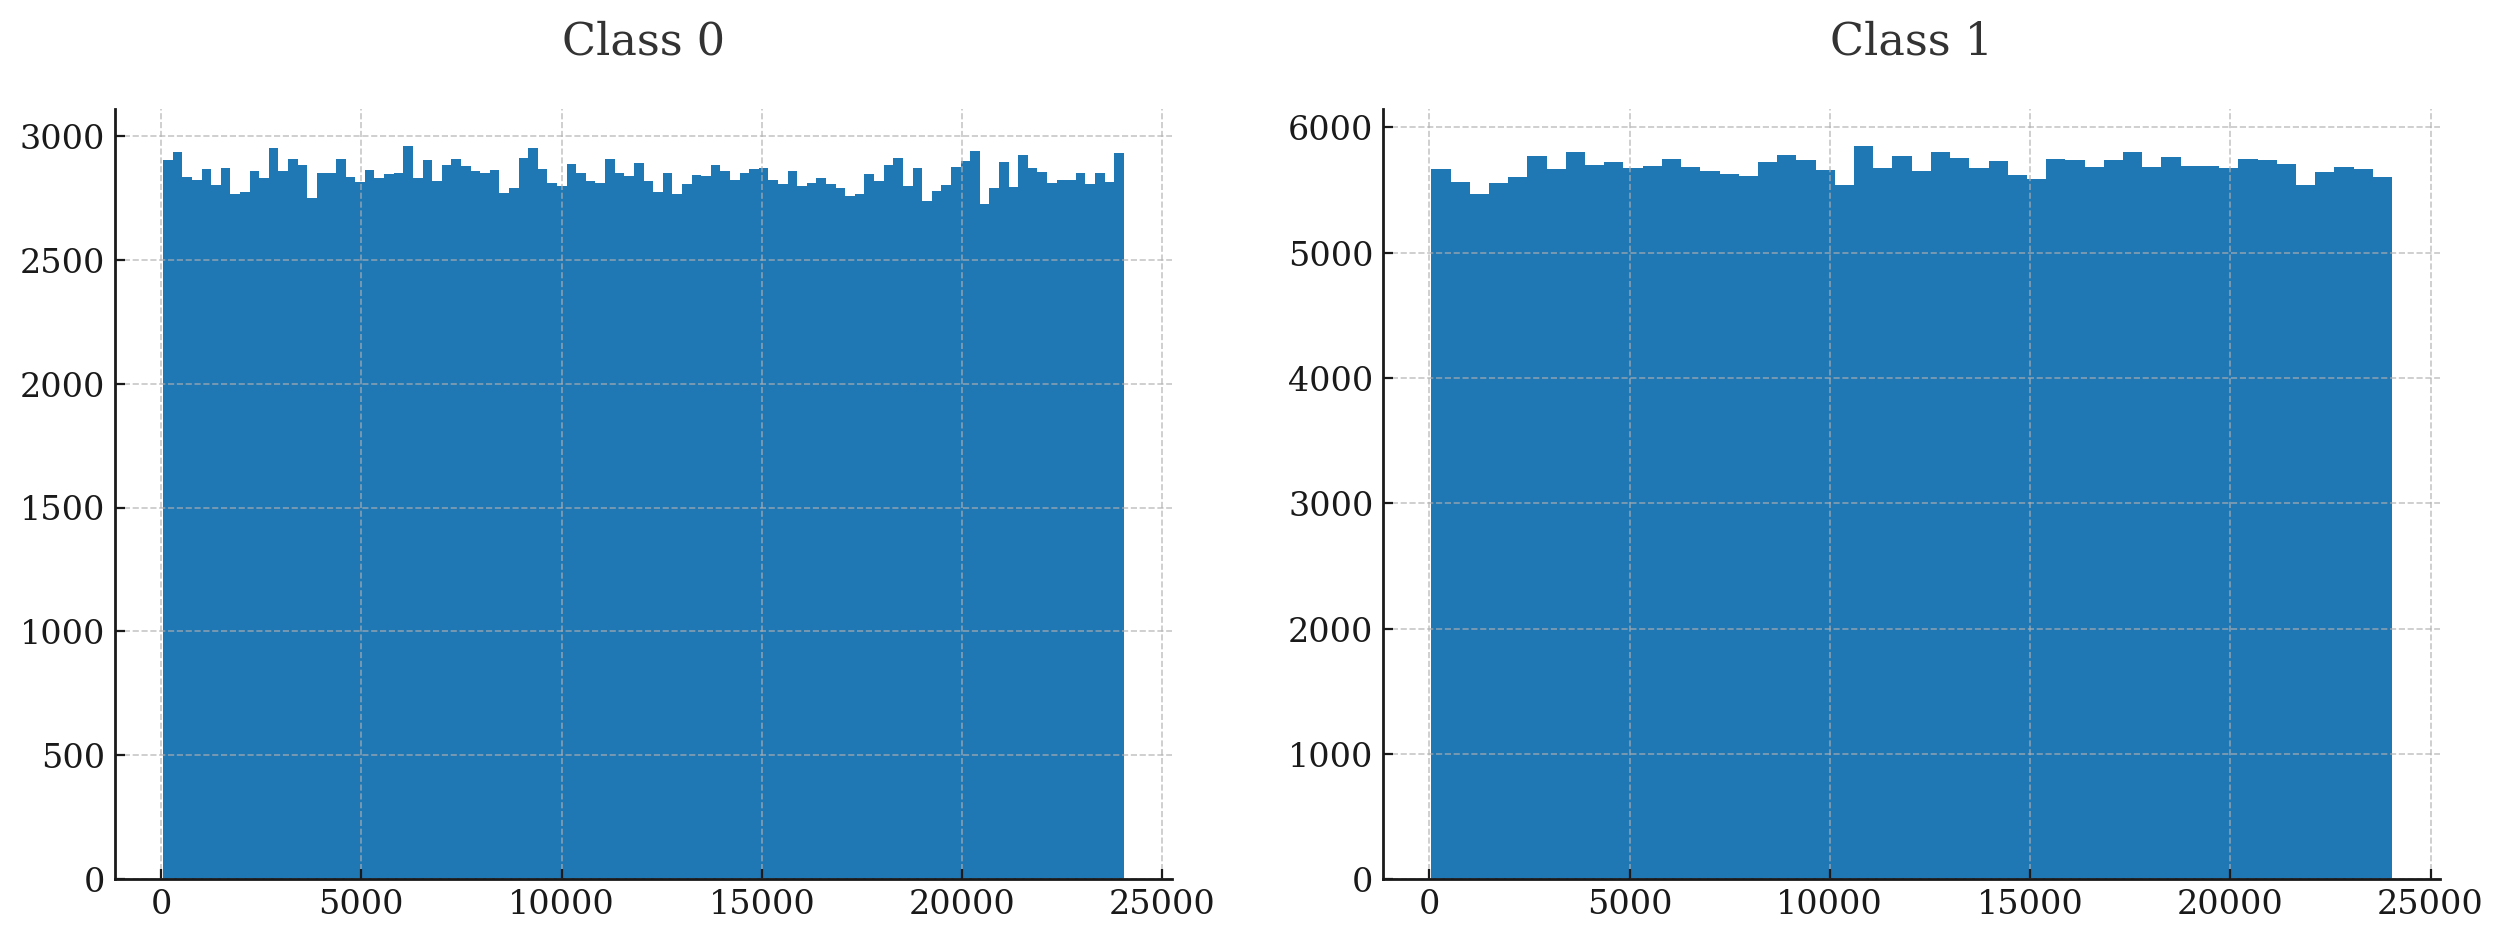

In [ ]:
# distribution of 'Amount' for each class
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df_dataset[df_dataset['Class'] == 0]['Amount'].hist(ax=ax[0], bins=50)
ax[0].set_title('Class 0')
df_dataset[df_dataset['Class'] == 1]['Amount'].hist(ax=ax[1], bins=50)
ax[1].set_title('Class 1')
plt.show()


In [8]:
# # Plot the distribution of each feature
# dir_path = os.path.join(repo_path, "reports", "plots")
# for col in df_dataset.columns:
#     plt.figure(figsize=(10, 6))
#     df_dataset[col].plot(kind='hist', bins=100, alpha=0.7, edgecolor='black', title=f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel("Frequency")

#     # save
#     plot_path = os.path.join(dir_path, f"{col}-hist.png")
#     plt.savefig(plot_path, bbox_inches='tight')

#     plt.show()
#     plt.close() # free memory

In [9]:
# # Pairplot
# import seaborn as sns
# sns.pairplot(df.sample(100), hue='Class', diag_kind='kde')
# plt.show()